In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
# 폰트 설정 방법 2
import matplotlib
import matplotlib.font_manager as fm

#plt.rc('font',family='AppleGothic')
# font_location = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font_location = 'C:/Windows/Fonts/Malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
matplotlib.rc('font', family=font_name)

Malgun Gothic


In [174]:
# plyaer data load 및 정리(프로필)
player_df = pd.read_csv('../../data/players_all.csv')
player_df = player_df.rename(columns={'Unnamed: 0':'Id'}).drop(['No.', 'Id'], axis=1)

In [175]:
# 1xbet data load 및 정리(스텟)
xbet_df = pd.read_csv('../../data/1xbet_all.csv')
xbet_df = xbet_df.drop(['Team','Age','Position'], axis=1).rename(columns={'Drb_x':'Drb_Off', 'Drb_y':'Drb_Def'})

In [176]:
# understat data load 및 정리(스텟)
understat_df = pd.read_csv('../../data/understat_all0.csv')
understat_df = understat_df.drop(['No','Team'], axis=1)

In [177]:
# capology load(연봉)
capology_df = pd.read_csv('../../data/capology_all0.csv')

In [178]:
# 프로필 + 연봉
eda_df = player_df.merge(capology_df[['Weekly Salary','Base Salary','ADJ Salary','Name', 'year']], how='left', left_on=['Name', 'year'], right_on=['Name', 'year'])
eda_df = eda_df[~eda_df.duplicated(['year', 'Name'], keep='first')] # 중복 제거

In [179]:
# 프로필 + 연봉 + 스텟(understat)
eda_df = eda_df.merge(understat_df, how='left', left_on=['Name', 'year'], right_on=['Name', 'year'])

In [180]:
# 프로필 + 연봉 + 스텟(understat) + 스텟(1xbet)
eda_df = eda_df.merge(
    xbet_df[[
        'Name', 'year', 'SpG', 'KeyP', 'Drb_Off', 'Fouled', 'Off',
        'Disp', 'UnsTch', 'Rating', 'Tackles', 'Inter','Fouls',
        'Offsides', 'Clear', 'Drb_Def', 'Blocks', 'AvgP', 'PS%']],
    how='left',
    left_on=['Name', 'year'],
    right_on=['Name', 'year']
)

In [181]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4756 entries, 0 to 4755
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           4756 non-null   int64  
 1   Name           4756 non-null   object 
 2   Age            4756 non-null   int64  
 3   Team           4756 non-null   object 
 4   Position       4756 non-null   object 
 5   Weekly Salary  4598 non-null   float64
 6   Base Salary    4598 non-null   float64
 7   ADJ Salary     4598 non-null   float64
 8   Apps           4744 non-null   float64
 9   Min            4744 non-null   float64
 10  G              4744 non-null   float64
 11  NPG            4744 non-null   float64
 12  A              4744 non-null   float64
 13  xG             4744 non-null   float64
 14  NPxG           4744 non-null   float64
 15  xA             4744 non-null   float64
 16  xGChain        4744 non-null   float64
 17  xGBuildup      4744 non-null   float64
 18  xG90    

In [182]:
eda_df = eda_df.dropna()

In [183]:
round(eda_df.describe(), 2)

,year,Age,Weekly Salary,Base Salary,ADJ Salary,Apps,Min,G,NPG,A,...,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb_Def,Blocks,AvgP,PS%
count,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,...,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00
mean,2017.93,25.91,53921.12,2803898.52,3076834.48,20.58,1466.58,1.96,1.81,1.39,...,6.65,1.12,0.78,0.70,0.13,1.53,0.61,0.22,29.00,76.91
std,2.60,4.21,52782.05,2744666.44,2942732.53,11.49,1032.21,3.52,3.18,2.19,...,0.36,0.84,0.70,0.46,0.23,1.75,0.48,0.29,16.44,12.42
min,2014.00,15.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,...,4.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2016.00,23.00,20000.00,1040000.00,1252784.00,11.00,532.50,0.00,0.00,0.00,...,6.40,0.50,0.18,0.38,0.00,0.33,0.25,0.00,17.00,72.73
50%,2018.00,26.00,40000.00,2080000.00,2301310.00,22.00,1390.00,1.00,1.00,1.00,...,6.65,1.00,0.65,0.68,0.00,0.86,0.53,0.11,27.29,79.32
75%,2020.00,29.00,70000.00,3640000.00,4071549.00,31.00,2326.25,2.00,2.00,2.00,...,6.88,1.63,1.20,1.00,0.15,2.09,0.88,0.33,38.44,84.32
max,2022.00,41.00,600000.00,31200000.00,33671679.00,38.00,3420.00,36.00,31.00,20.00,...,8.34,7.00,4.22,4.00,2.00,11.50,4.00,2.05,90.41,100.00


In [184]:
eda_df['Age Lev'] = eda_df['Age'].apply(lambda age: '<21' if age < 21 else '21' if age ==21 else '22' if age == 22 
                                        else '23' if age == 23 else '24' if age == 24 else '25' if age == 25 
                                        else '26' if age == 26 else '27' if age == 27 else '28' if age == 28 
                                        else '29' if age == 29 else '30' if age == 30 else '31' if age == 31 
                                        else '32' if age == 32 else '32<' )

In [185]:
static_df = eda_df[eda_df['Min']>1000].groupby(['Position', 'Age Lev']).mean(numeric_only=True)
static_df

year        Age  Weekly Salary   Base Salary  \
Position   Age Lev                                                        
Defender   21       2018.435897  21.000000   35715.974359  1.857231e+06   
           22       2018.326923  22.000000   48183.807692  2.505558e+06   
           23       2018.785714  23.000000   52715.100000  2.741186e+06   
           24       2018.145631  24.000000   53852.504854  2.800330e+06   
           25       2017.963964  25.000000   52978.342342  2.754874e+06   
           26       2017.800000  26.000000   52883.840000  2.749960e+06   
           27       2018.064815  27.000000   57040.055556  2.966083e+06   
           28       2018.263736  28.000000   63069.109890  3.279593e+06   
           29       2017.712644  29.000000   56405.827586  2.933103e+06   
           30       2017.853333  30.000000   54739.226667  2.846440e+06   
           31       2018.259259  31.000000   66594.370370  3.462907e+06   
           32       2018.113636  32.000000   59644.681818  3.101523e+06   
           32<      2017.271186  34.033898   56041.728814  2.914169e+06   
           <21      2018.023256  19.465116   27447.232558  1.427256e+06   
Forward    21       2017.666667  21.000000   73902.533333  3.842933e+06   
           22       2018.368421  22.000000   80524.289474  4.187263e+06   
           23       2018.288889  23.000000   73765.222222  3.835791e+06   
           24       2018.148148  24.000000   78269.962963  4.070037e+06   
           25       2017.939394  25.000000   76348.484848  3.970121e+06   
           26       2017.677966  26.000000   77653.186441  4.037966e+06   
           27       2017.529412  27.000000   85637.254902  4.453137e+06   
           28       2017.760000  28.000000   90054.220000  4.682820e+06   
           29       2018.043478  29.000000   82066.478261  4.267457e+06   
           30       2018.878788  30.000000  110537.878788  5.747970e+06   
           31       2018.347826  31.000000   98449.000000  5.119348e+06   
           32       2019.200000  32.000000   95596.200000  4.971000e+06   
           32<      2018.555556  33.833333  107051.277778  5.566667e+06   
           <21      2018.472222  19.333333   45380.333333  2.359778e+06   
Goalkeeper 21       2020.000000  21.000000   17500.000000  9.100000e+05   
           22       2018.000000  22.000000   30625.000000  1.592500e+06   
           23       2018.777778  23.000000   66401.666667  3.452889e+06   
           24       2017.727273  24.000000   88171.363636  4.584909e+06   
           25       2018.000000  25.000000   68750.000000  3.575000e+06   
           26       2017.363636  26.000000   68636.363636  3.569091e+06   
           27       2017.565217  27.000000   60794.304348  3.161304e+06   
           28       2017.640000  28.000000   69354.600000  3.606440e+06   
           29       2018.363636  29.000000   69045.454545  3.590364e+06   
           30       2018.000000  30.000000   85059.000000  4.423067e+06   
           31       2018.000000  31.000000   75250.000000  3.913000e+06   
           32       2017.769231  32.000000   52004.461538  2.704231e+06   
           32<      2018.279070  34.465116   61162.790698  3.180465e+06   
           <21      2021.000000  20.000000   15000.000000  7.800000e+05   
Midfielder 21       2018.622222  21.000000   50325.622222  2.616933e+06   
           22       2018.455882  22.000000   56220.352941  2.923459e+06   
           23       2018.150000  23.000000   59775.475000  3.108325e+06   
           24       2017.838710  24.000000   58357.118280  3.034570e+06   
           25       2017.869565  25.000000   60968.400000  3.170357e+06   
           26       2017.838095  26.000000   71195.409524  3.702162e+06   
           27       2017.752475  27.000000   71974.108911  3.742653e+06   
           28       2017.781250  28.000000   71807.093750  3.733969e+06   
           29       2017.777778  29.000000   75861.123457  3.944778e+06   
           30       2017.827586  30.000000   83411.1

In [186]:
static_df 

year        Age  Weekly Salary   Base Salary  \
Position   Age Lev                                                        
Defender   21       2018.435897  21.000000   35715.974359  1.857231e+06   
           22       2018.326923  22.000000   48183.807692  2.505558e+06   
           23       2018.785714  23.000000   52715.100000  2.741186e+06   
           24       2018.145631  24.000000   53852.504854  2.800330e+06   
           25       2017.963964  25.000000   52978.342342  2.754874e+06   
           26       2017.800000  26.000000   52883.840000  2.749960e+06   
           27       2018.064815  27.000000   57040.055556  2.966083e+06   
           28       2018.263736  28.000000   63069.109890  3.279593e+06   
           29       2017.712644  29.000000   56405.827586  2.933103e+06   
           30       2017.853333  30.000000   54739.226667  2.846440e+06   
           31       2018.259259  31.000000   66594.370370  3.462907e+06   
           32       2018.113636  32.000000   59644.681818  3.101523e+06   
           32<      2017.271186  34.033898   56041.728814  2.914169e+06   
           <21      2018.023256  19.465116   27447.232558  1.427256e+06   
Forward    21       2017.666667  21.000000   73902.533333  3.842933e+06   
           22       2018.368421  22.000000   80524.289474  4.187263e+06   
           23       2018.288889  23.000000   73765.222222  3.835791e+06   
           24       2018.148148  24.000000   78269.962963  4.070037e+06   
           25       2017.939394  25.000000   76348.484848  3.970121e+06   
           26       2017.677966  26.000000   77653.186441  4.037966e+06   
           27       2017.529412  27.000000   85637.254902  4.453137e+06   
           28       2017.760000  28.000000   90054.220000  4.682820e+06   
           29       2018.043478  29.000000   82066.478261  4.267457e+06   
           30       2018.878788  30.000000  110537.878788  5.747970e+06   
           31       2018.347826  31.000000   98449.000000  5.119348e+06   
           32       2019.200000  32.000000   95596.200000  4.971000e+06   
           32<      2018.555556  33.833333  107051.277778  5.566667e+06   
           <21      2018.472222  19.333333   45380.333333  2.359778e+06   
Goalkeeper 21       2020.000000  21.000000   17500.000000  9.100000e+05   
           22       2018.000000  22.000000   30625.000000  1.592500e+06   
           23       2018.777778  23.000000   66401.666667  3.452889e+06   
           24       2017.727273  24.000000   88171.363636  4.584909e+06   
           25       2018.000000  25.000000   68750.000000  3.575000e+06   
           26       2017.363636  26.000000   68636.363636  3.569091e+06   
           27       2017.565217  27.000000   60794.304348  3.161304e+06   
           28       2017.640000  28.000000   69354.600000  3.606440e+06   
           29       2018.363636  29.000000   69045.454545  3.590364e+06   
           30       2018.000000  30.000000   85059.000000  4.423067e+06   
           31       2018.000000  31.000000   75250.000000  3.913000e+06   
           32       2017.769231  32.000000   52004.461538  2.704231e+06   
           32<      2018.279070  34.465116   61162.790698  3.180465e+06   
           <21      2021.000000  20.000000   15000.000000  7.800000e+05   
Midfielder 21       2018.622222  21.000000   50325.622222  2.616933e+06   
           22       2018.455882  22.000000   56220.352941  2.923459e+06   
           23       2018.150000  23.000000   59775.475000  3.108325e+06   
           24       2017.838710  24.000000   58357.118280  3.034570e+06   
           25       2017.869565  25.000000   60968.400000  3.170357e+06   
           26       2017.838095  26.000000   71195.409524  3.702162e+06   
           27       2017.752475  27.000000   71974.108911  3.742653e+06   
           28       2017.781250  28.000000   71807.093750  3.733969e+06   
           29       2017.777778  29.000000   75861.123457  3.944778e+06   
           30       2017.827586  30.000000   83411.1

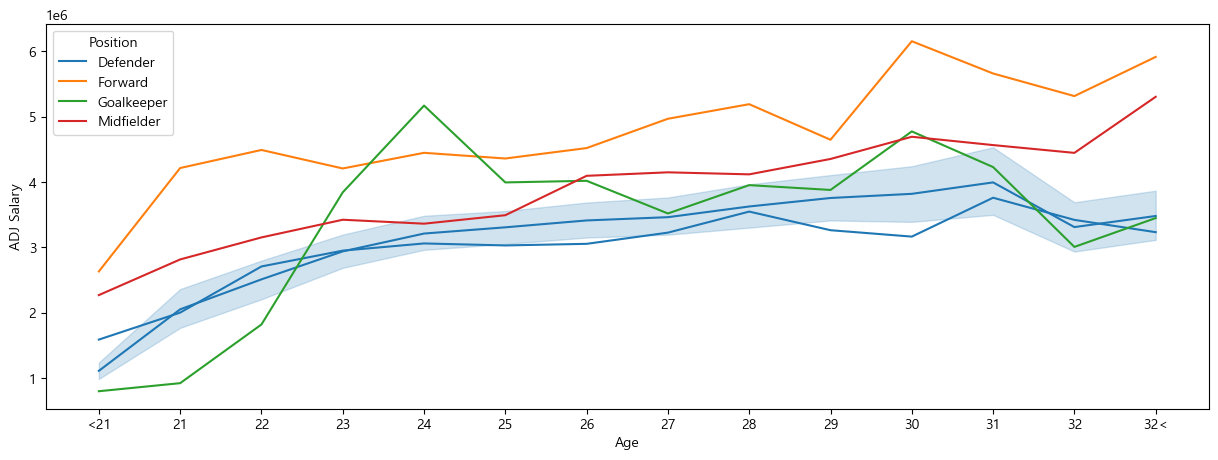

In [187]:
plt.figure(figsize=(15, 5))
# 'Age Lev' 컬럼을 순서에 맞게 정렬
age_order = ['<21', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '32<']
eda_df['Age Lev'] = pd.Categorical(eda_df['Age Lev'], categories=age_order, ordered=True)
sns.lineplot(data=eda_df, x='Age Lev', y='ADJ Salary')
sns.lineplot(data=static_df, x='Age Lev', y='ADJ Salary', hue='Position', palette='tab10')
plt.legend(title='Position', loc='upper left')
plt.xlabel('Age')
plt.ylabel('ADJ Salary')
plt.show()

In [188]:
static2_df = eda_df[eda_df['Name']=='Son Heung-Min']
static2_df

,year,Name,Age,Team,Position,Weekly Salary,Base Salary,ADJ Salary,Apps,Min,...,Tackles,Inter,Fouls,Offsides,Clear,Drb_Def,Blocks,AvgP,PS%,Age Lev
898,2015,Son Heung-Min,23,Tottenham,Forward,85000.0,4420000.0,5271178.0,28.0,1110.0,...,0.964286,0.428571,0.428571,0.0,0.250000,0.678571,0.035714,15.964286,79.642058,23
1142,2016,Son Heung-Min,24,Tottenham,Forward,85000.0,4420000.0,5139717.0,34.0,2069.0,...,0.558824,0.235294,0.264706,0.0,0.176471,0.588235,0.029412,22.823529,81.185567,24
1695,2017,Son Heung-Min,25,Tottenham,Forward,85000.0,4420000.0,5024513.0,37.0,2315.0,...,0.459459,0.270270,0.405405,0.0,0.243243,0.702703,0.000000,24.756757,85.152838,25
2164,2018,Son Heung-Min,26,Tottenham,Forward,85000.0,4420000.0,4938673.0,31.0,2061.0,...,0.741935,0.258065,0.387097,0.0,0.129032,0.774194,0.064516,24.258065,85.638298,26
2646,2019,Son Heung-Min,27,Tottenham,Forward,140000.0,7280000.0,8054587.0,30.0,2511.0,...,0.766667,0.633333,0.566667,0.0,0.566667,1.600000,0.000000,26.566667,84.692597,27
3152,2020,Son Heung-Min,28,Tottenham,Forward,140000.0,7280000.0,7856725.0,37.0,3139.0,...,0.864865,0.378378,0.378378,0.0,0.081081,1.459459,0.081081,28.567568,83.443709,28
3667,2021,Son Heung-Min,29,Tottenham,Forward,190000.0,9880000.0,9880000.0,35.0,3051.0,...,0.428571,0.371429,0.400000,0.0,0.228571,0.514286,0.171429,29.000000,86.600985,29
4265,2022,Son Heung-Min,30,Tottenham,Forward,190000.0,9880000.0,9880000.0,36.0,2920.0,...,0.666667,0.361111,0.361111,0.0,0.111111,0.583333,0.055556,21.805556,82.038217,30


In [189]:
static_df = eda_df[eda_df['Min'] > 1000].groupby(['Position', 'Age Lev']).mean(numeric_only=True)
forward_static_df = static_df.loc['Forward']

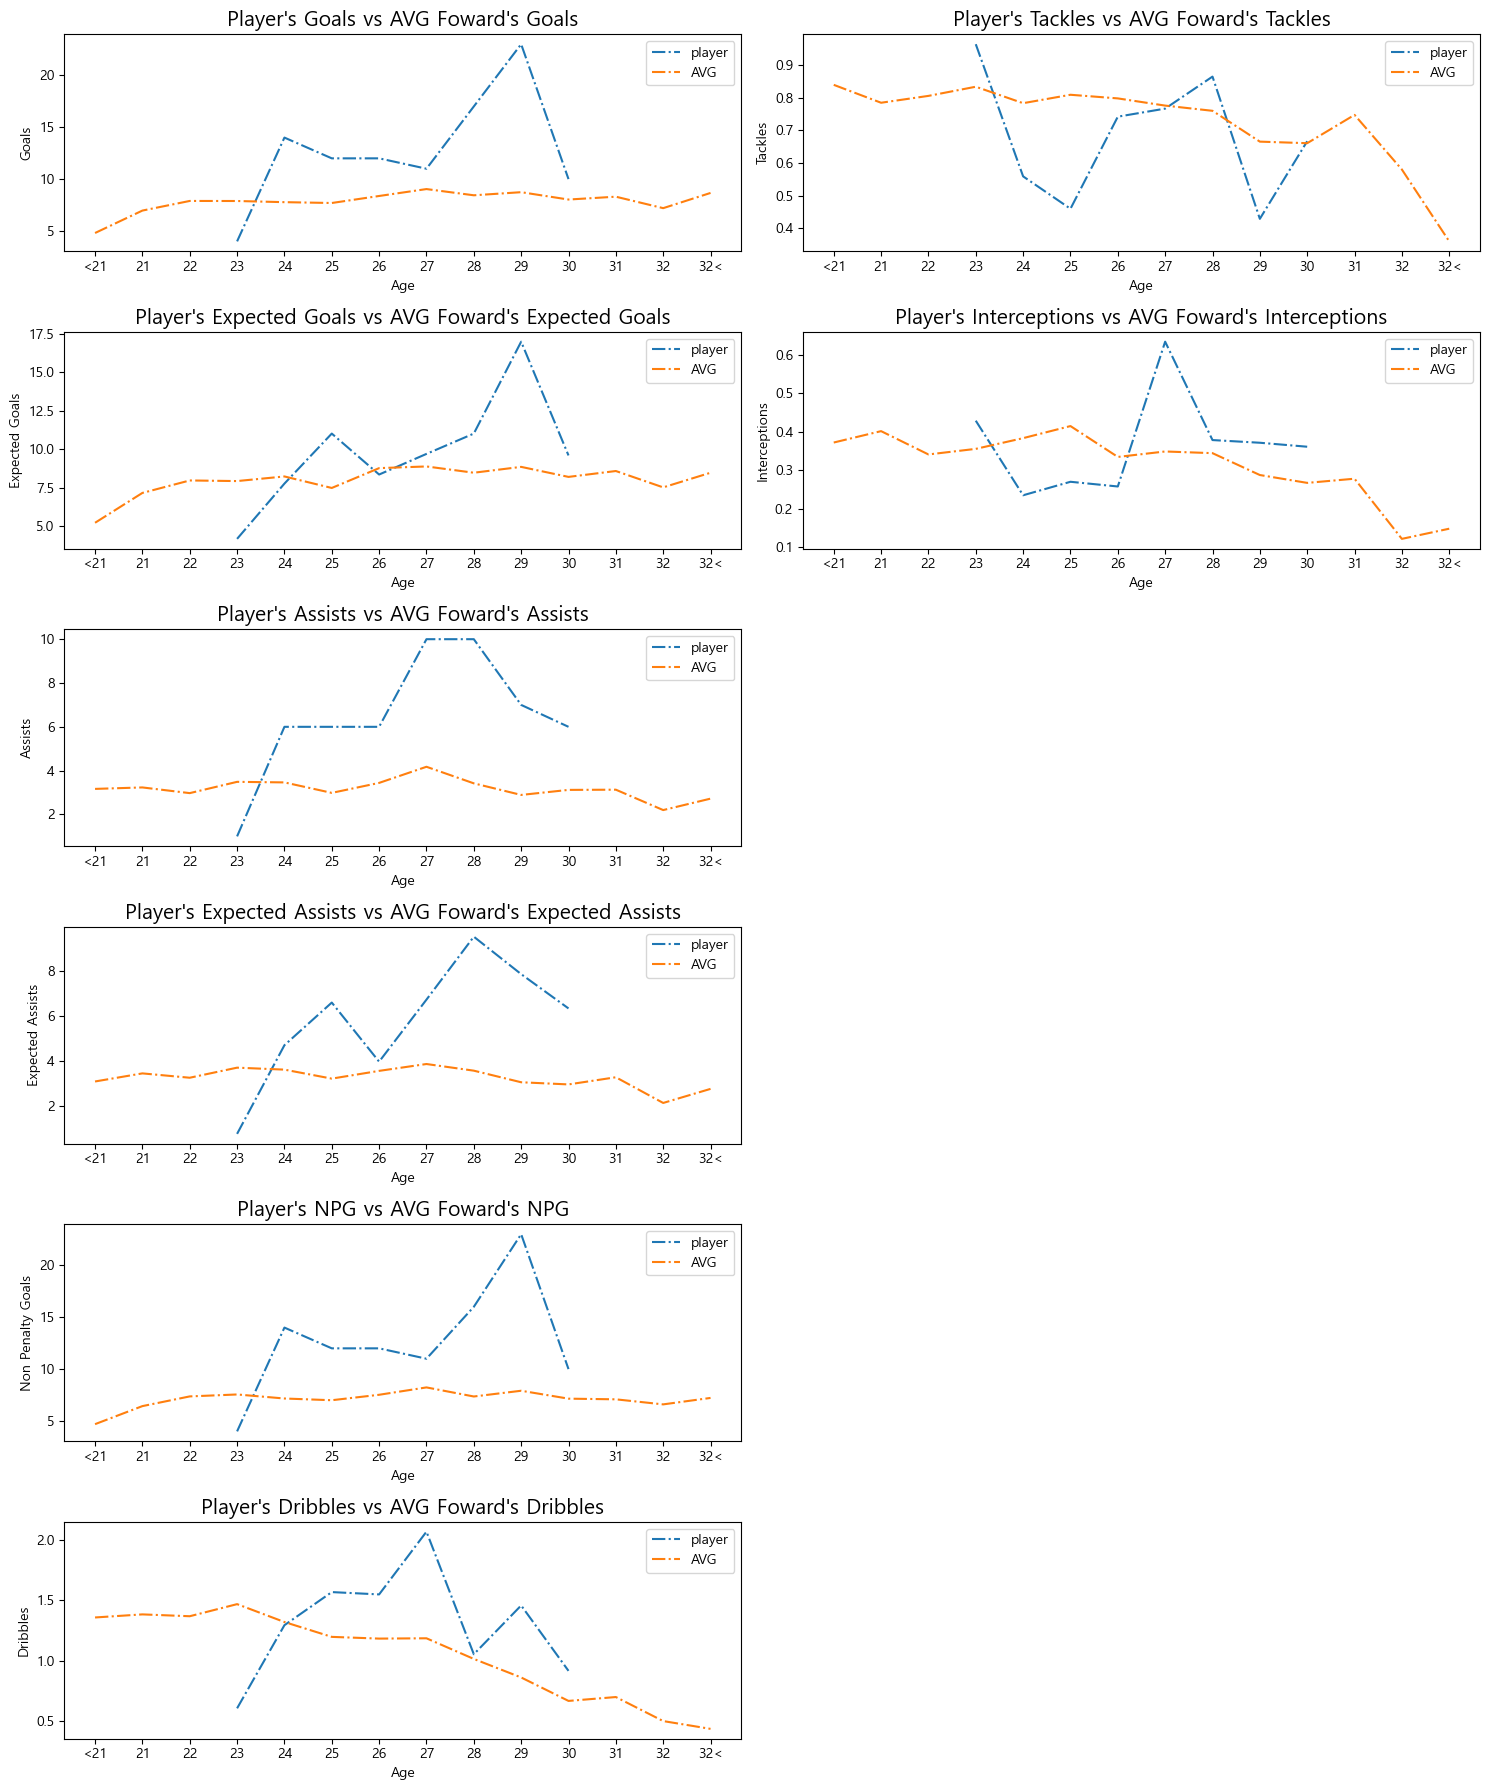

In [190]:
plt.figure(figsize=(15, 18))
# 'Age Lev' 컬럼을 순서에 맞게 정렬
age_order = ['<21', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '32<']
eda_df['Age Lev'] = pd.Categorical(eda_df['Age Lev'], categories=age_order, ordered=True)
plt.subplot(6, 2, 1)
sns.lineplot(data=static2_df, x='Age Lev', y='G', label='player',linestyle='dashdot')
sns.lineplot(data=forward_static_df , x='Age Lev', y='G', label='AVG',linestyle='dashdot')
plt.title("Player's Goals vs AVG Foward's Goals",fontsize = 15, y=1)
plt.xlabel('Age')
plt.ylabel("Goals")
plt.legend()

# 두 번째 그래프 그리기
plt.subplot(6, 2, 3)
sns.lineplot(data=static2_df, x='Age Lev', y='xG', label='player',linestyle='dashdot')
sns.lineplot(data=forward_static_df , x='Age Lev', y='xG', label='AVG',linestyle='dashdot')
plt.title("Player's Expected Goals vs AVG Foward's Expected Goals",fontsize = 15, y=1)
plt.xlabel('Age')
plt.ylabel("Expected Goals")
plt.legend()

plt.subplot(6, 2, 5)
sns.lineplot(data=static2_df, x='Age Lev', y='A', label='player',linestyle='dashdot')
sns.lineplot(data=forward_static_df , x='Age Lev', y='A', label='AVG',linestyle='dashdot')
plt.title("Player's Assists vs AVG Foward's Assists",fontsize = 15, y=1)
plt.xlabel('Age')
plt.ylabel("Assists")
plt.legend()

plt.subplot(6, 2, 7)
sns.lineplot(data=static2_df, x='Age Lev', y='xA', label='player',linestyle='dashdot')
sns.lineplot(data=forward_static_df , x='Age Lev', y='xA', label='AVG',linestyle='dashdot')
plt.title("Player's Expected Assists vs AVG Foward's Expected Assists",fontsize = 15, y=1)
plt.xlabel('Age')
plt.ylabel("Expected Assists")
plt.legend()

plt.subplot(6, 2, 9)
sns.lineplot(data=static2_df, x='Age Lev', y='NPG', label='player',linestyle='dashdot')
sns.lineplot(data=forward_static_df , x='Age Lev', y='NPG', label='AVG',linestyle='dashdot')
plt.title("Player's NPG vs AVG Foward's NPG",fontsize = 15, y=1)
plt.xlabel('Age')
plt.ylabel('Non Penalty Goals')
plt.legend()

plt.subplot(6, 2, 11)
sns.lineplot(data=static2_df, x='Age Lev', y='Drb_Off', label='player',linestyle='dashdot')
sns.lineplot(data=forward_static_df , x='Age Lev', y='Drb_Off', label='AVG',linestyle='dashdot')
plt.title("Player's Dribbles vs AVG Foward's Dribbles",fontsize = 15, y=1)
plt.xlabel('Age')
plt.ylabel('Dribbles')
plt.legend()

plt.subplot(6, 2, 2)
sns.lineplot(data=static2_df, x='Age Lev', y='Tackles', label='player',linestyle='dashdot')
sns.lineplot(data=forward_static_df , x='Age Lev', y='Tackles', label='AVG',linestyle='dashdot')
plt.title("Player's Tackles vs AVG Foward's Tackles",fontsize = 15, y=1)
plt.xlabel('Age')
plt.ylabel('Tackles')
plt.legend()

plt.subplot(6, 2, 4)
sns.lineplot(data=static2_df, x='Age Lev', y='Inter', label='player',linestyle='dashdot')
sns.lineplot(data=forward_static_df , x='Age Lev', y='Inter', label='AVG',linestyle='dashdot')
plt.title("Player's Interceptions vs AVG Foward's Interceptions",fontsize = 15, y=1)
plt.xlabel('Age')
plt.ylabel('Interceptions')
plt.legend()

plt.tight_layout()
plt.show()

In [191]:
forward_eda_df = eda_df[(eda_df['Position'] == 'Forward') & (eda_df['Min'] > 1000)]

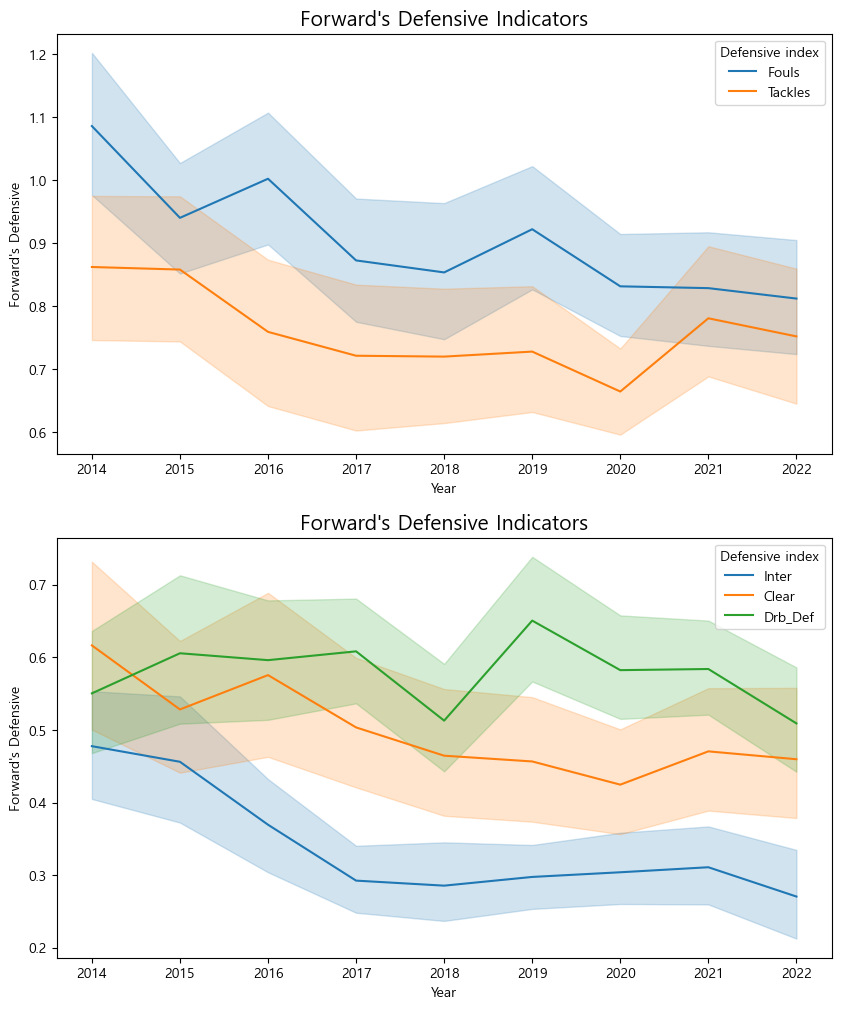

In [192]:
plt.figure(figsize=(10, 12))
plt.subplot(2, 1, 1)
sns.lineplot(data=forward_eda_df, x='year', y='Fouls', label='Fouls')
sns.lineplot(data=forward_eda_df, x='year', y='Tackles', label='Tackles')
plt.title("Forward's Defensive Indicators",fontsize = 15, y=1)
plt.xlabel('Year')
plt.ylabel("Forward's Defensive")
plt.legend(title='Defensive index', loc='upper right')

plt.subplot(2, 1, 2)
sns.lineplot(data=forward_eda_df, x='year', y='Inter', label='Inter')
sns.lineplot(data=forward_eda_df, x='year', y='Clear', label='Clear')
sns.lineplot(data=forward_eda_df, x='year', y='Drb_Def', label='Drb_Def')
plt.title("Forward's Defensive Indicators",fontsize = 15, y=1)
plt.xlabel('Year')
plt.ylabel("Forward's Defensive")
plt.legend(title='Defensive index', loc='upper right')

In [193]:
Defender_eda_df = eda_df[(eda_df['Position'] == 'Defender') & (eda_df['Min'] > 1000)]
Defender_eda_df['year'].value_counts

<bound method IndexOpsMixin.value_counts of 8       2014
14      2014
16      2014
17      2014
18      2014
        ... 
4562    2022
4581    2022
4606    2022
4607    2022
4622    2022
Name: year, Length: 1036, dtype: int64>

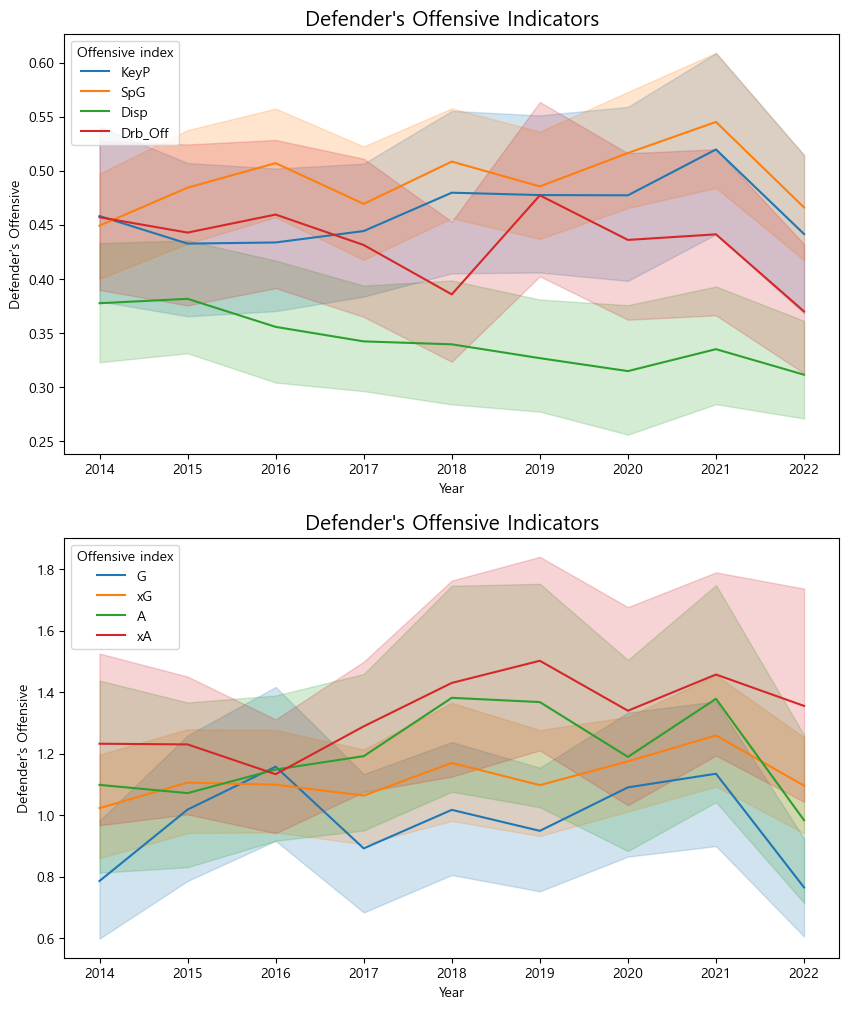

In [194]:
plt.figure(figsize=(10, 12))
plt.subplot(2, 1, 1)
sns.lineplot(data=Defender_eda_df, x='year', y='KeyP', label='KeyP')
sns.lineplot(data=Defender_eda_df, x='year', y='SpG', label='SpG')
sns.lineplot(data=Defender_eda_df, x='year', y='Disp', label='Disp')
sns.lineplot(data=Defender_eda_df, x='year', y='Drb_Off', label='Drb_Off')
plt.title("Defender's Offensive Indicators",fontsize = 15, y=1)
plt.xlabel('Year')
plt.ylabel("Defender's Offensive")
plt.legend(title='Offensive index',loc='upper left')

plt.subplot(2, 1, 2)
sns.lineplot(data=Defender_eda_df, x='year', y='G', label='G')
sns.lineplot(data=Defender_eda_df, x='year', y='xG', label='xG')
sns.lineplot(data=Defender_eda_df, x='year', y='A', label='A')
sns.lineplot(data=Defender_eda_df, x='year', y='xA', label='xA')
plt.title("Defender's Offensive Indicators",fontsize = 15, y=1)
plt.xlabel('Year')
plt.ylabel("Defender's Offensive")
plt.legend(title='Offensive index',loc='upper left')